Resized Dimensions: 84x150


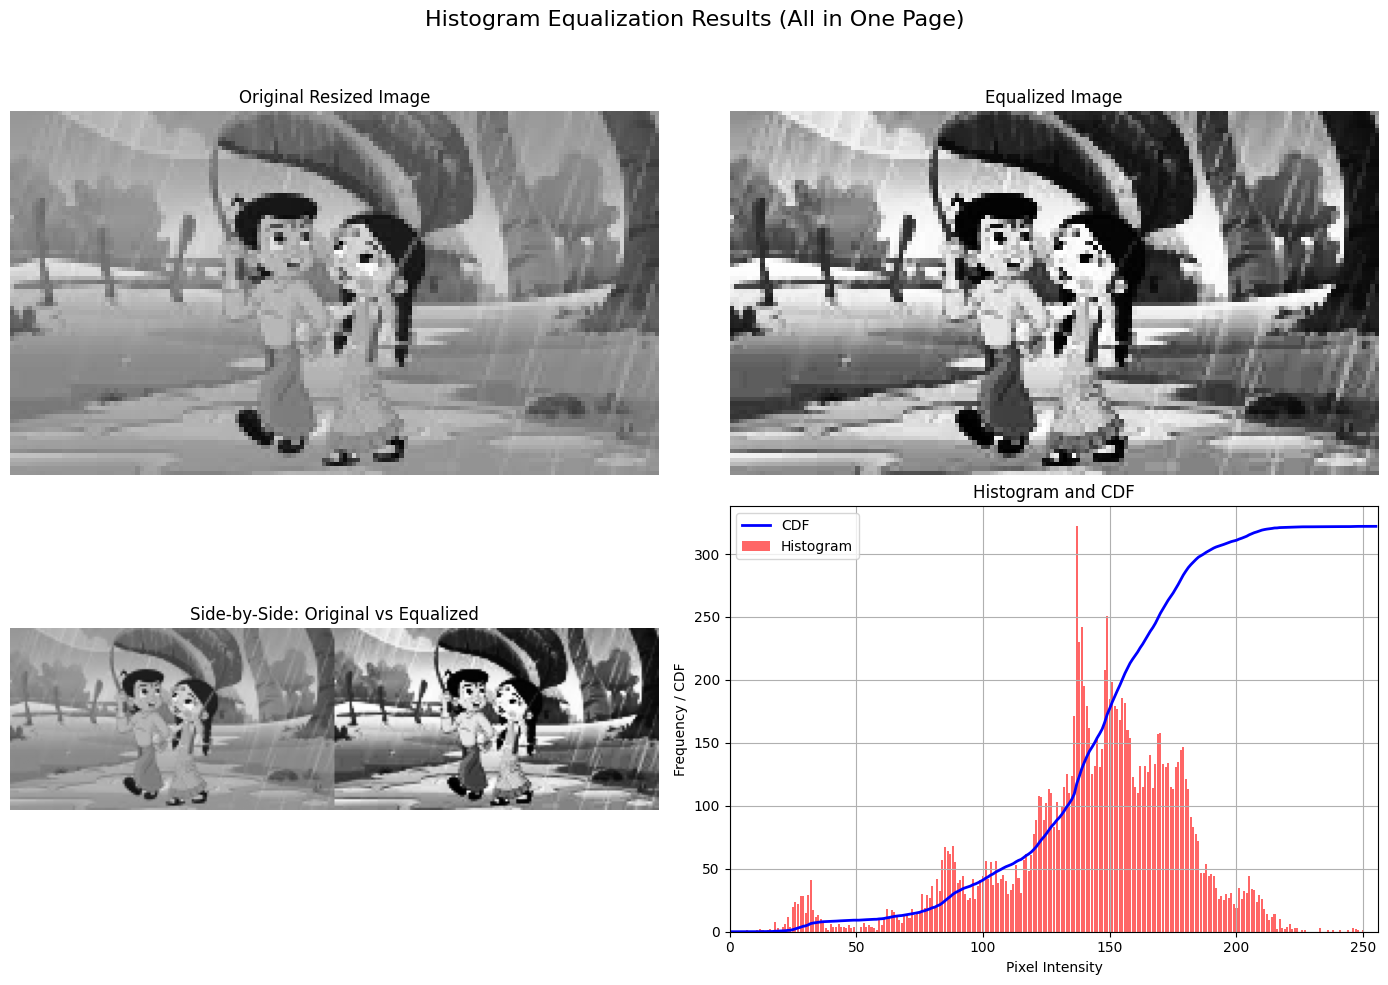

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- PART 1: Read and Resize Image ---
img_path = r"/content/download (5).jpeg"

# Read image and convert to grayscale
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Resize image to 50%
scale_percent = 50
width = int(gray.shape[1] * scale_percent / 100)
height = int(gray.shape[0] * scale_percent / 100)
resized = cv2.resize(gray, (width, height), interpolation=cv2.INTER_AREA)

print(f"Resized Dimensions: {resized.shape[0]}x{resized.shape[1]}")

# --- PART 2: Histogram Equalization ---
equalized = cv2.equalizeHist(resized)

# Side-by-side for display
side_by_side = np.hstack((resized, equalized))

# --- PART 3: Histogram and CDF ---
hist = cv2.calcHist([resized], [0], None, [256], [0, 256]).flatten()
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max() / cdf.max()

# --- PART 4: Display All in One Page ---
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Original Resized Image
axs[0, 0].imshow(resized, cmap='gray')
axs[0, 0].set_title('Original Resized Image')
axs[0, 0].axis('off')

# 2. Equalized Image
axs[0, 1].imshow(equalized, cmap='gray')
axs[0, 1].set_title('Equalized Image')
axs[0, 1].axis('off')

# 3. Side-by-Side Comparison
axs[1, 0].imshow(side_by_side, cmap='gray')
axs[1, 0].set_title('Side-by-Side: Original vs Equalized')
axs[1, 0].axis('off')

# 4. Histogram and CDF
axs[1, 1].bar(range(256), hist, color='r', alpha=0.6, label='Histogram')
axs[1, 1].plot(cdf_normalized, color='b', linewidth=2, label='CDF')
axs[1, 1].set_xlim([0, 256])
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency / CDF')
axs[1, 1].set_title('Histogram and CDF')
axs[1, 1].legend()
axs[1, 1].grid(True)

# Overall Title and Save
plt.suptitle('Histogram Equalization Results (All in One Page)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("histogram_all_in_one_page.png")
plt.show()
